# 1. Importing Libraries

In this section, we import the required libraries for bibliometric analysis and data visualization.

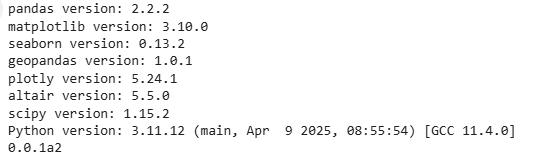

In [ ]:
#!pip install vl-convert-python pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 42.3 MB/s eta 0:00:00


In [ ]:
import pandas                         as pd
import matplotlib.pyplot              as plt
import seaborn                        as sns
import geopandas                      as gpd
import plotly.express                 as px
import altair                         as alt
import pandas                         as pd
import plotly                         as plotly
import scipy                          as scipy
import altair                         as alt
import plotly.graph_objects           as go
import sys
import google.colab

from pywaffle                         import Waffle
from scipy.stats                      import chi2_contingency


In [ ]:
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("geopandas version:", gpd.__version__)
print("plotly version:", plotly.__version__)
print("altair version:", alt.__version__)
print("scipy version:", scipy.__version__)
print("Python version:", sys.version)
print(google.colab.__version__)

pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
geopandas version: 1.1.1
plotly version: 5.24.1
altair version: 5.5.0
scipy version: 1.16.1
Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
0.0.1a2


# 2. Loading the Dataset

Here we load the bibliographic data, typically exported from a reference manager or database in a BibTeX or CSV format.

In [ ]:
# Load the CSV file
file_path = "/content/Tabla de Algoritmos de Deep Learning - Hoja 1.csv" # Consider renaming the file for clarity if possible
df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)


# 3. Preprocessing Data

We clean and preprocess the data to prepare it for analysis.

In [ ]:
# Replace "China " with "China" in the "Pais de estudio" (Country of study) column
# Consider renaming columns to English for consistency: e.g., df.rename(columns={'Pais de estudio': 'Country_of_Study'}, inplace=True)
df["Pais de estudio"] = df["Pais de estudio"].replace("China ", "China")

In [ ]:
df["Pais de estudio"].unique() # Display unique values after cleaning

array(['USA', nan, 'South Korea', 'China', 'Brazil', 'Canada',
       'Indonesia', 'Algeria', 'Turkey', 'Portugal', 'India',
       'Australia ', 'Global', 'Grecia', 'Not Specified', 'Spain',
       'Australia', 'Iran', 'South Africa', 'Not specified ', 'Korea',
       'Not specified', 'Rusia', 'Pakistán', 'Europe ', 'Czech ',
       'Sahara ', 'Tailandia', 'Hawái', 'Congo'], dtype=object)

In [ ]:
# Analyze Source Category
unique_source_categories = df['Source Category'].unique()
unique_source_categories # Display unique source categories

array(['Remote sensing', 'Meteorological', 'Topographic',
       'Socio-economic', nan, 'Socio economic', 'Topograhic'],
      dtype=object)

In [ ]:
# Replace "Socio-economic" with "Socio economic" and "Topograhic" with "Topographic"
df = df.replace("Socio-economic", "Socio economic")
df = df.replace("Topograhic", "Topographic")

In [ ]:
unique_source_categories = df['Source Category'].unique()
unique_source_categories # Display unique source categories after cleaning

array(['Remote sensing', 'Meteorological', 'Topographic',
       'Socio economic', nan], dtype=object)

In [ ]:
# 1. Null value analysis
null_values = df.isnull().sum()
print("Null values per column:\n", null_values) # Check for null values

Null values per column:
 Autor                     950
ML o DL                   922
Algoritmo Nombre          836
Algoritmo                 838
Arquitectura              951
Pais de estudio           948
Región de estudio         938
Fuente de datos           930
Nombre Metrica            742
Metrica de evaluacion     742
Repositorio               950
Source Category            38
Source type               664
Product                   472
Feature name               77
Temporal res.             826
Spatial res.              412
Output deseado            912
Link repository          1028
dtype: int64


# 4. Bibliometric Analysis

This section includes the main bibliometric computations, such as most frequent authors, journals, keywords, and countries.

In [ ]:
# Count the frequency of each unique value in the `Source Category` column and select the top 5 categories
top_4_categories = df['Source Category'].value_counts().head(5)

In [ ]:
# Calculate percentages
total_count_top4 = top_4_categories.sum() # Renamed variable
top_4_categories_percentages = (top_4_categories / total_count_top4) * 100

/tmp/ipython-input-758460150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')


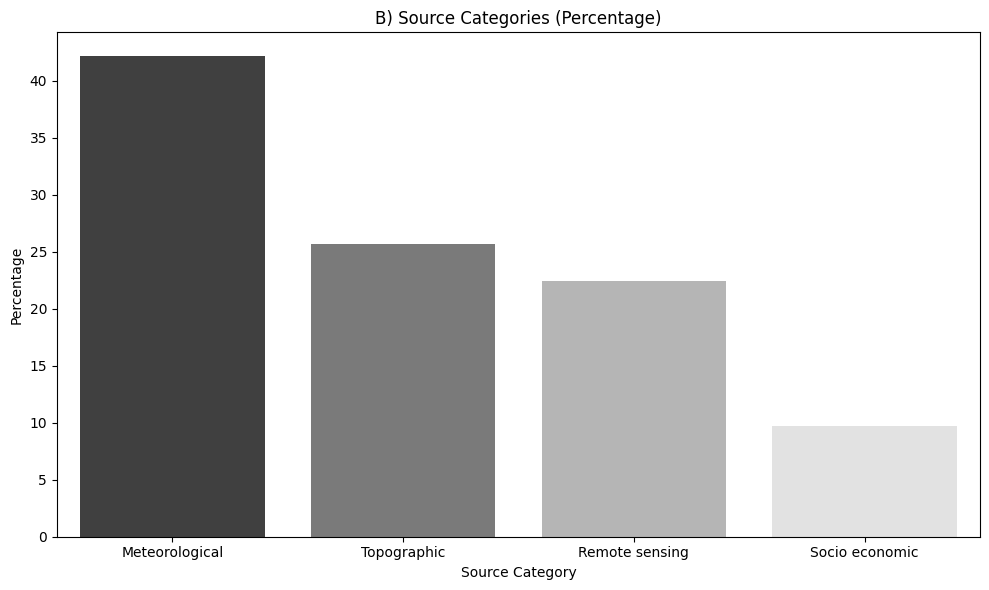

In [ ]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
# Create the bar plot directly from the Series
sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')
plt.title('B) Source Categories (Percentage)')  # Set the title of the plot
plt.xlabel('Source Category')  # Set the label for the x-axis
plt.ylabel('Percentage')  # Set the label for the y-axis
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

In [ ]:
# Calculate percentages for all categories, not just the top 4
category_counts = df['Source Category'].value_counts()
total_count_all_cat = category_counts.sum() # Renamed variable
category_percentages = (category_counts / total_count_all_cat) * 100

In [ ]:
# Print the percentages
print("Percentage of each Source Category:")
print(category_percentages)

Percentage of each Source Category:
Source Category
Meteorological    42.157842
Topographic       25.674326
Remote sensing    22.477522
Socio economic     9.690310
Name: count, dtype: float64


In [ ]:
# Calculate percentages for waffle chart (same as above)
source_category_counts = df['Source Category'].value_counts()
total_count_src = source_category_counts.sum()
source_category_percentages = (source_category_counts / total_count_src) * 100

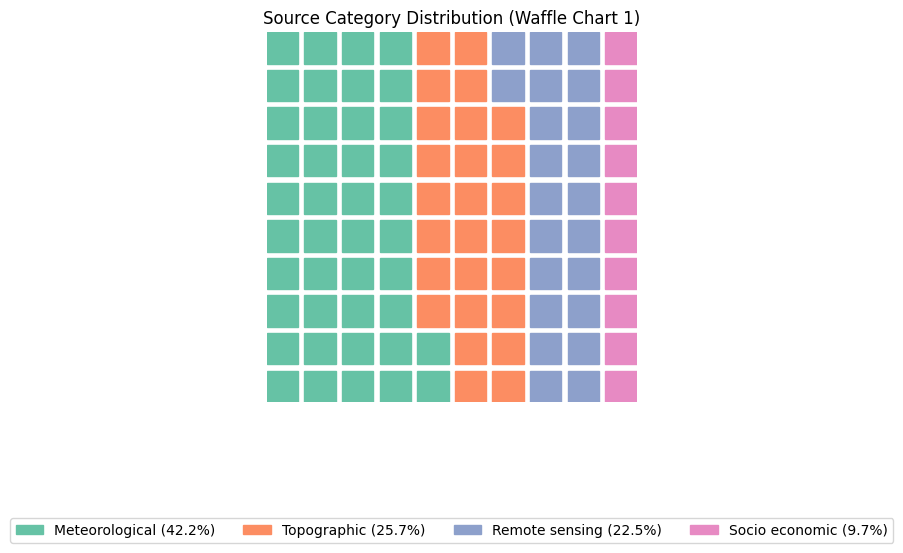

In [ ]:
# Select the top N categories (adjust N as needed)
top_n = 10  # Example: Top 10 categories
top_categories_waffle = source_category_percentages.head(top_n) # Renamed variable

fig_waffle1 = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=top_categories_waffle.values,
    labels=[f"{label} ({value:.1f}%)" for label, value in zip(top_categories_waffle.index, top_categories_waffle.values)],
    legend={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.4), 'ncol': len(top_categories_waffle)}, # Center the legend
    figsize=(10, 6),  # Adjust figure size
    title={'label': 'Source Category Distribution (Waffle Chart 1)', 'loc': 'center'}
)
plt.show()

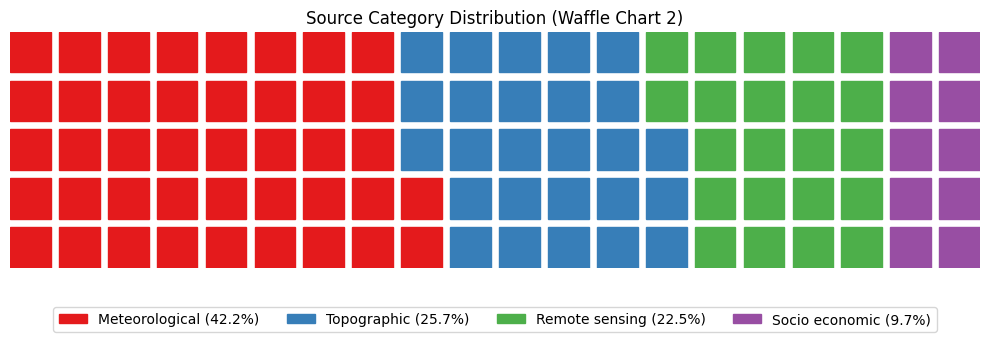

In [ ]:
# Create another waffle chart with different parameters
fig_waffle2 = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=top_categories_waffle.values, # Using the same top N categories
    labels=[f"{label} ({value:.1f}%)" for label, value in zip(top_categories_waffle.index, top_categories_waffle.values)],
    legend={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.3), 'ncol': len(top_categories_waffle)}, # Adjust legend position
    figsize=(10, 6),  # Adjust figure size
    title={'label': 'Source Category Distribution (Waffle Chart 2)', 'loc': 'center'},
    cmap_name = "Set1" # Added color parameter
)
# Adjust the layout to center the waffle chart
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=0.9, wspace=0.2, hspace=0.2)
plt.show()

# 5. Network and Visualization

We generate co-authorship, co-citation, and keyword co-occurrence networks with appropriate visualizations.

In [ ]:
# Analysis of most used algorithm per country of study

# Group the data by 'Algoritmo' (Algorithm) and 'Pais de estudio' (Country of study) and count occurrences
# Consider renaming columns for consistency
grouped_data_all = df.groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

In [ ]:
# Display the first 5 rows of the grouped data
print(grouped_data_all.head().to_markdown(index=False, numalign="left", stralign="left"))

| Algoritmo   | Pais de estudio   | Count   |
|:------------|:------------------|:--------|
| ANN         | Australia         | 1       |
| ANN         | China             | 1       |
| ANN         | Czech             | 1       |
| AdaBoost    | India             | 1       |
| AutoGluon   | China             | 1       |


In [ ]:
# Print the column names and their data types
print(grouped_data_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Algoritmo        82 non-null     object
 1   Pais de estudio  82 non-null     object
 2   Count            82 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None


In [ ]:
# Get the top 14 algorithms
top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

In [ ]:
# Group the data by 'Algoritmo' and 'Pais de estudio', filtering for the top 14 algorithms
grouped_data_top14 = df[df['Algoritmo'].isin(top_14_algorithms)].groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

In [ ]:
# Display the first 5 rows of the filtered grouped data
print(grouped_data_top14.head().to_markdown(index=False, numalign="left", stralign="left"))

| Algoritmo   | Pais de estudio   | Count   |
|:------------|:------------------|:--------|
| ANN         | Australia         | 1       |
| ANN         | China             | 1       |
| ANN         | Czech             | 1       |
| CNN         | Brazil            | 1       |
| CNN         | China             | 2       |


In [ ]:
# Print the column names and their data types for the filtered data
print(grouped_data_top14.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Algoritmo        38 non-null     object
 1   Pais de estudio  38 non-null     object
 2   Count            38 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB
None


In [ ]:
# Create a heatmap for top 14 algorithms vs country
heatmap_top14 = alt.Chart(grouped_data_top14).mark_rect().encode(
    x=alt.X('Pais de estudio', title='Country of Study'), # Map 'Pais de estudio' to x-axis
    y=alt.Y('Algoritmo', title='Algorithm'), # Map 'Algoritmo' to y-axis
    color=alt.Color('Count', title='Count', # Use 'Count' for color intensity
                    scale=alt.Scale(range='heatmap')), # Use heatmap color scale
    tooltip=['Algoritmo', 'Pais de estudio', 'Count'] # Add tooltips
).properties(
    title='Heatmap of Algorithm vs Country of Study (Top 14 Algorithms)', # Set title
    width=600,  # Set width
    height=400   # Set height
).interactive()  # Enable interactivity

In [ ]:
# Save the heatmap
heatmap_top14.save('algorithm_country_heatmap_top14.json')

In [ ]:
# Display the heatmap
heatmap_top14

alt.Chart(...)

In [ ]:
# Create an adjusted heatmap with larger size and font
heatmap_adjusted = alt.Chart(grouped_data_top14).mark_rect().encode(
    x=alt.X('Pais de estudio', title=''), # Map to x-axis, remove title
    y=alt.Y('Algoritmo', title='Algorithm'), # Map to y-axis
    color=alt.Color('Count', title='Count', # Use 'Count' for color intensity
                    scale=alt.Scale(range=['#f0f0f0', '#000000'])), # Use grey color scale
    tooltip=['Algoritmo', 'Pais de estudio', 'Count'] # Add tooltips
).properties(
    title='Heatmap of Algorithm vs. Country of Study (Top 14 Algorithms)', # Set title
    width=1200,  # Increase width
    height=800   # Increase height
).configure_axis(
    labelFontSize=16,  # Increase axis label font size
    titleFontSize=20   # Increase axis title font size
).configure_title(
    fontSize=24         # Increase plot title font size
).configure_legend(
    titleFontSize=16,   # Increase legend title font size
    labelFontSize=14    # Increase legend label font size
).interactive()  # Enable interactivity

In [ ]:
# Save the adjusted heatmap
heatmap_adjusted.save('algorithm_country_heatmap_adjusted.json')

In [ ]:
# Display the adjusted heatmap
heatmap_adjusted

alt.Chart(...)

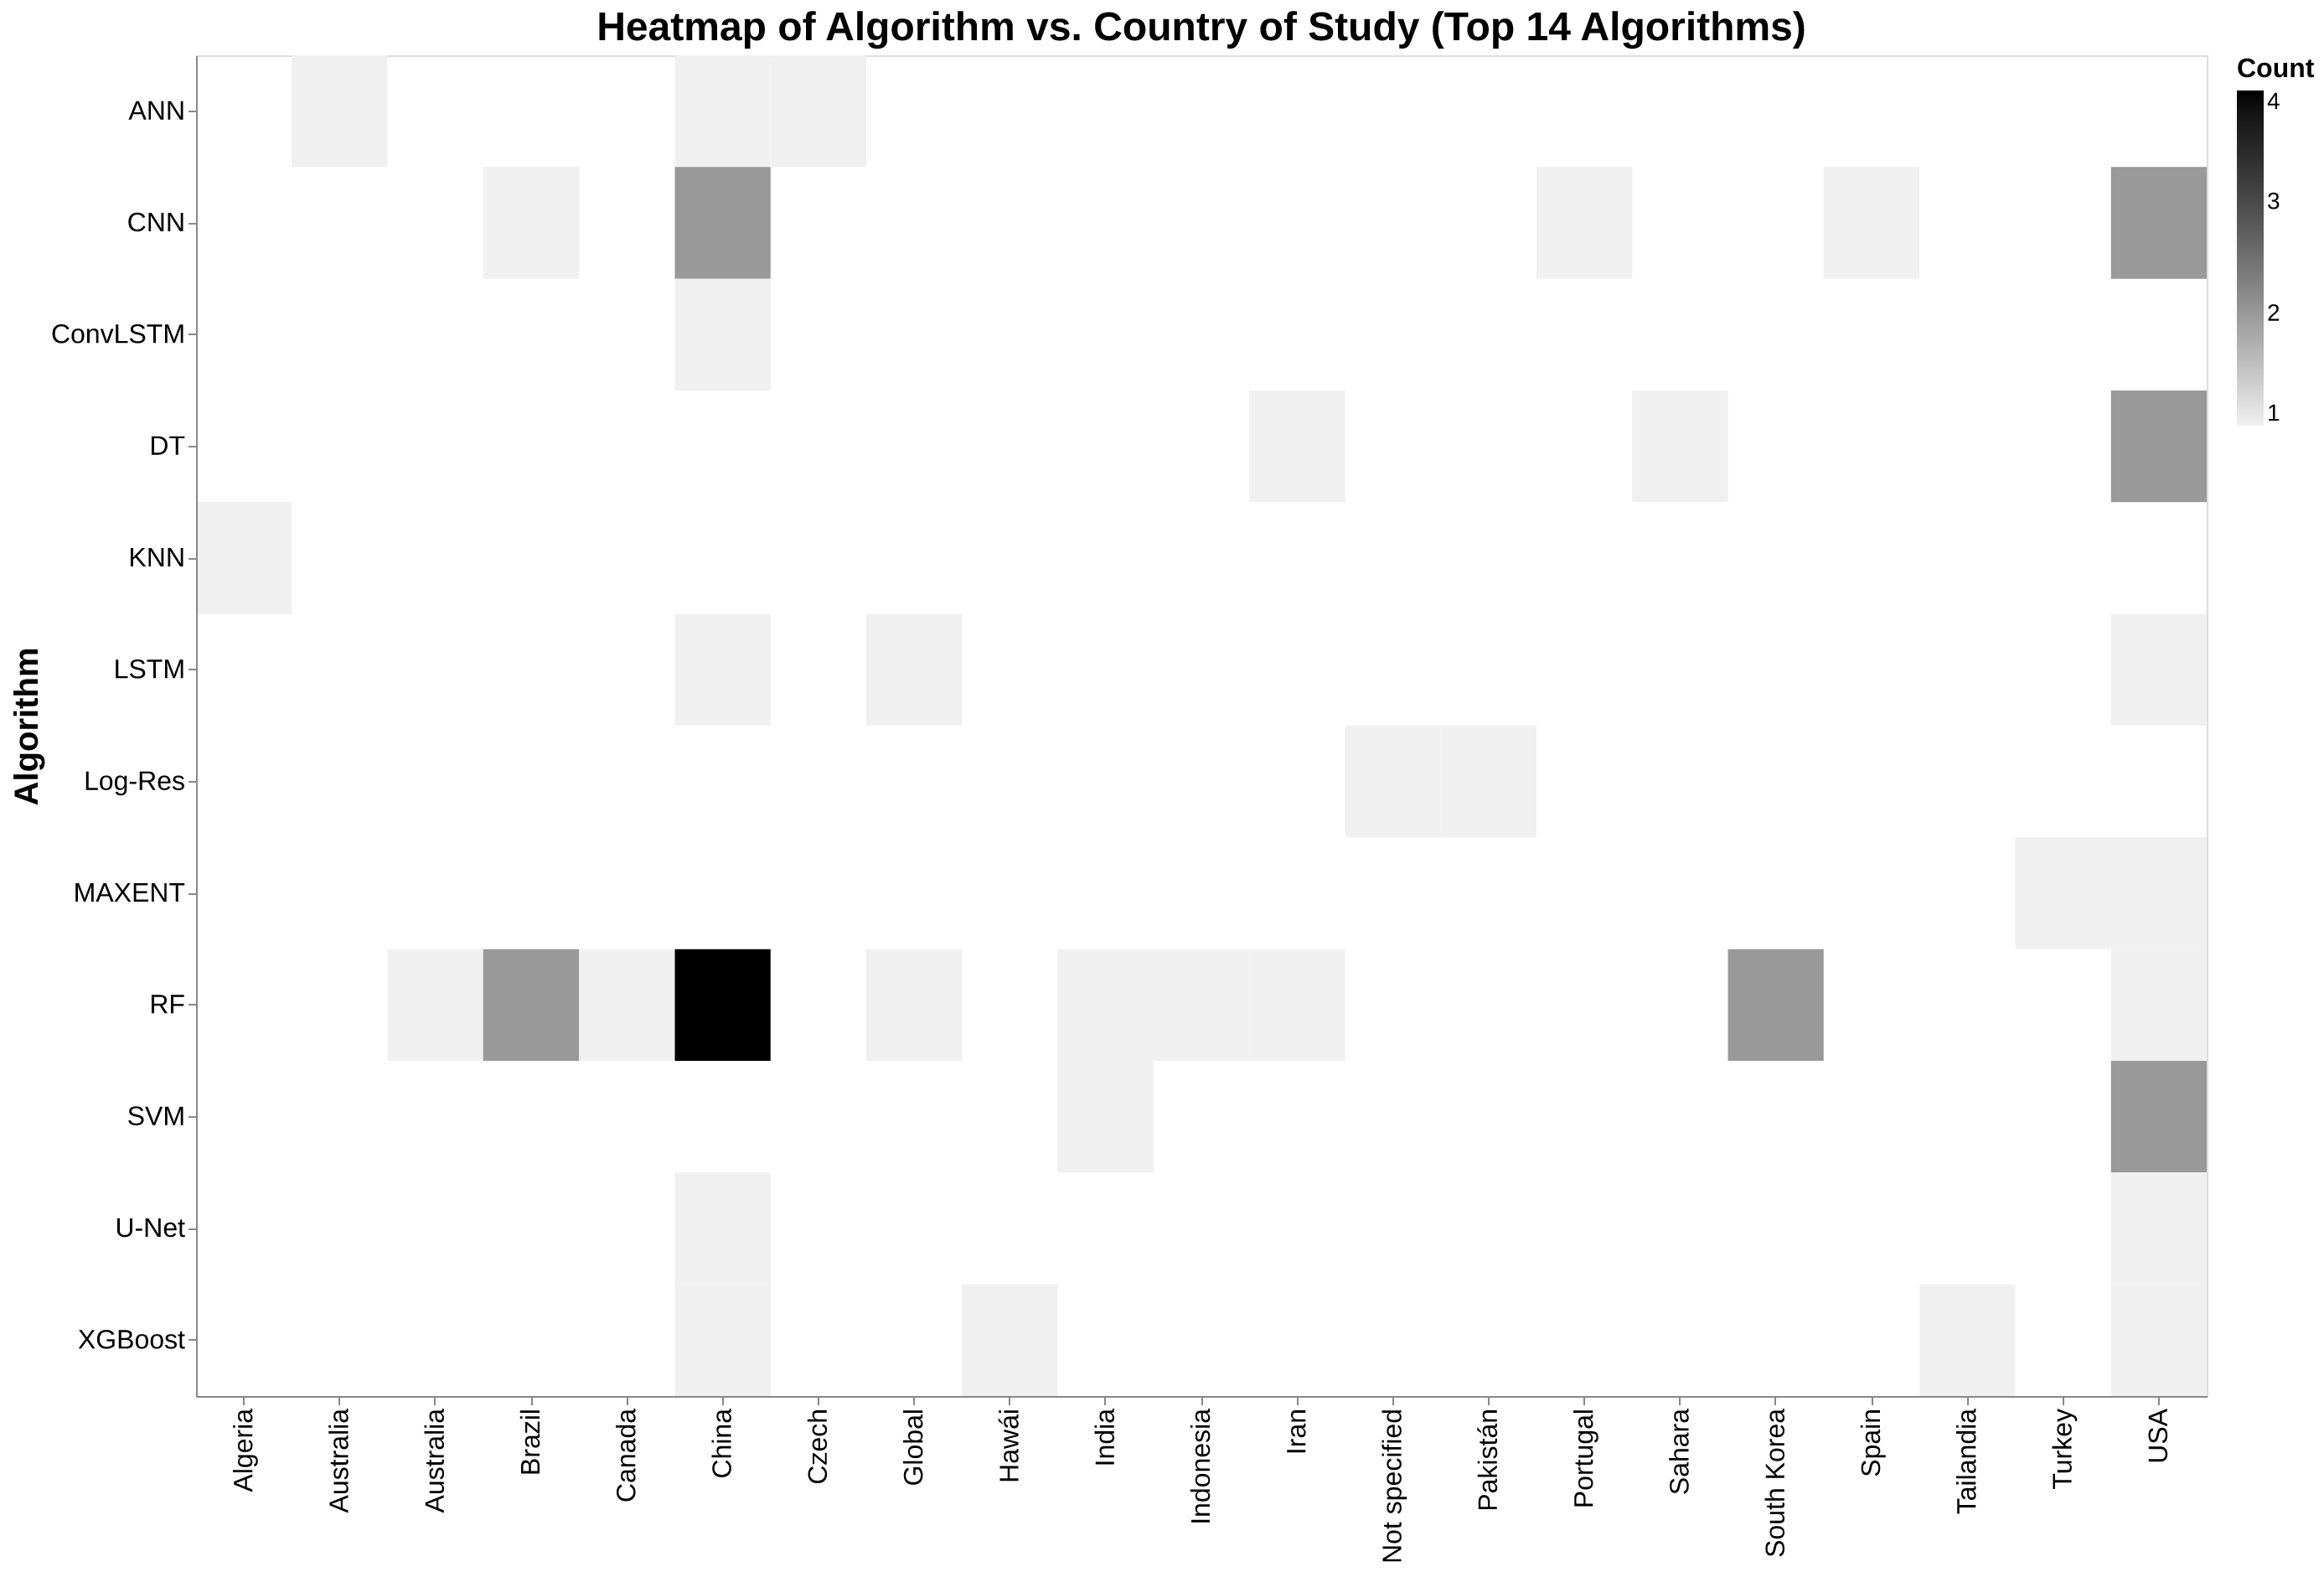

In [ ]:
# prompt: que el plot anterior sea imagen a 300p

# Previous code is unchanged

# ... (all the previous code) ...


# Save the adjusted heatmap as a PNG image with 300 DPI
heatmap_adjusted.save('algorithm_country_heatmap_adjusted.png', scale_factor=2.0) #scale_factor increases the resolution

# Display the saved image
from IPython.display import Image
Image('algorithm_country_heatmap_adjusted.png')


In [ ]:
# Sankey Diagram: Algorithm vs Country of Study (Top 14 Algorithms)

In [ ]:
# Filter the DataFrame to include only the top 14 algorithms (already defined)
df_filtered_top14 = df[df['Algoritmo'].isin(top_14_algorithms)]

In [ ]:
# Group the data (already defined as grouped_data_top14)
# grouped_data_top14 = df_filtered_top14.groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

# Prepare the data for the Sankey diagram
source_nodes = []
target_nodes = []
values = []
algorithm_map = {} # Renamed dict
country_map = {}   # Renamed dict

node_index = 0

In [ ]:
# Create mapping for algorithms (sources)
for algo in grouped_data_top14['Algoritmo'].unique():
    if algo not in algorithm_map:
        algorithm_map[algo] = node_index
        node_index += 1

In [ ]:
# Create mapping for countries (targets)
for country in grouped_data_top14['Pais de estudio'].unique():
    if country not in country_map:
        country_map[country] = node_index
        node_index += 1

In [ ]:
# Populate source, target, value lists using the mappings
for index, row in grouped_data_top14.iterrows():
  algorithm = row['Algoritmo']
  country = row['Pais de estudio']
  count = row['Count']

  source_nodes.append(algorithm_map[algorithm])
  target_nodes.append(country_map[country])
  values.append(count)


In [ ]:
# Create the list of labels for nodes
node_labels = list(algorithm_map.keys()) + list(country_map.keys())

In [ ]:
# Create the Sankey diagram
fig_sankey = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = dict(
      source = source_nodes,
      target = target_nodes,
      value = values
  ))])

fig_sankey.update_layout(title_text="Sankey Diagram: Algorithm vs Country of Study (Top 14 Algorithms)", font_size=10)
fig_sankey.show()

/tmp/ipython-input-669479339.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




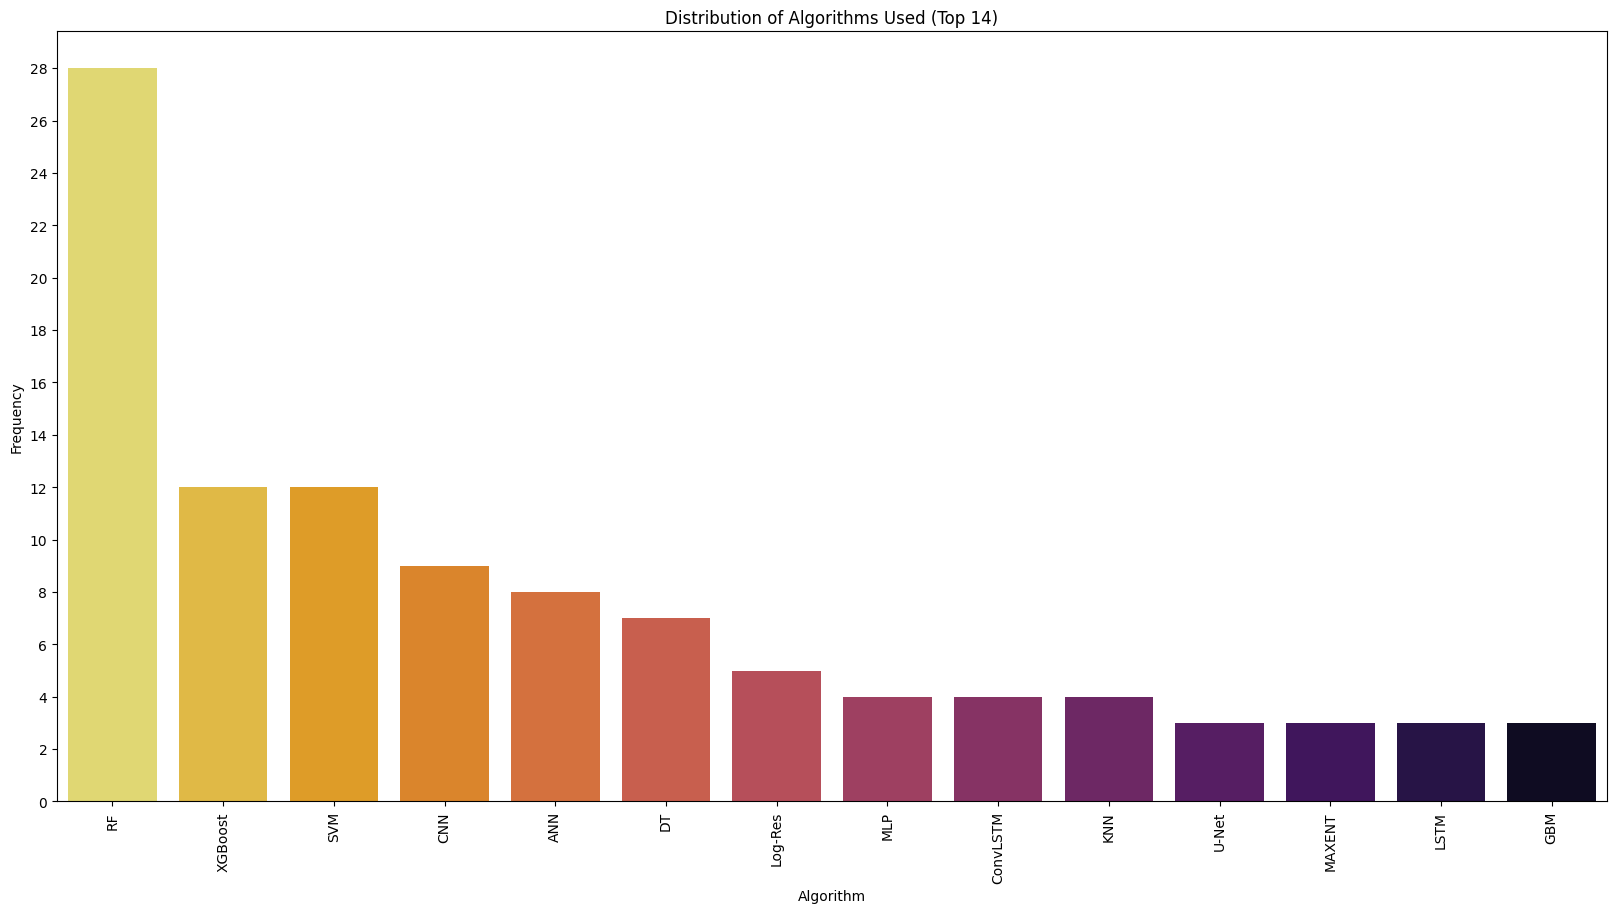

In [ ]:
# Algorithm Distribution (Top 14)
algorithms_distribution = df["Algoritmo"].value_counts().head(14)
plt.figure(figsize=(20, 10))
sns.barplot(x=algorithms_distribution.index, y=algorithms_distribution.values, palette='inferno_r')
plt.xticks(rotation=90)
plt.title("Distribution of Algorithms Used (Top 14)")
plt.xlabel("Algorithm")
plt.ylabel("Frequency")
plt.yticks(range(0, algorithms_distribution.max()+2, 2))
plt.show()


In [ ]:
# Algorithm Distribution (Top 14 + Others)

# Count all algorithms
algorithms_distribution_all = df['Algoritmo'].value_counts()
total_count_alg = algorithms_distribution_all.sum()

In [ ]:
# Separate top 14 and others
top_14_alg_counts = algorithms_distribution_all.head(14) # Renamed
others_count_alg = algorithms_distribution_all[14:].sum() # Renamed

In [ ]:
# Create a new Series including "Others"
algorithms_dist_with_others = pd.concat([top_14_alg_counts, pd.Series({'Others': others_count_alg})]) # Renamed

In [ ]:
# Calculate percentages
algorithms_percentages = (algorithms_dist_with_others / total_count_alg) * 100

/tmp/ipython-input-2335293101.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




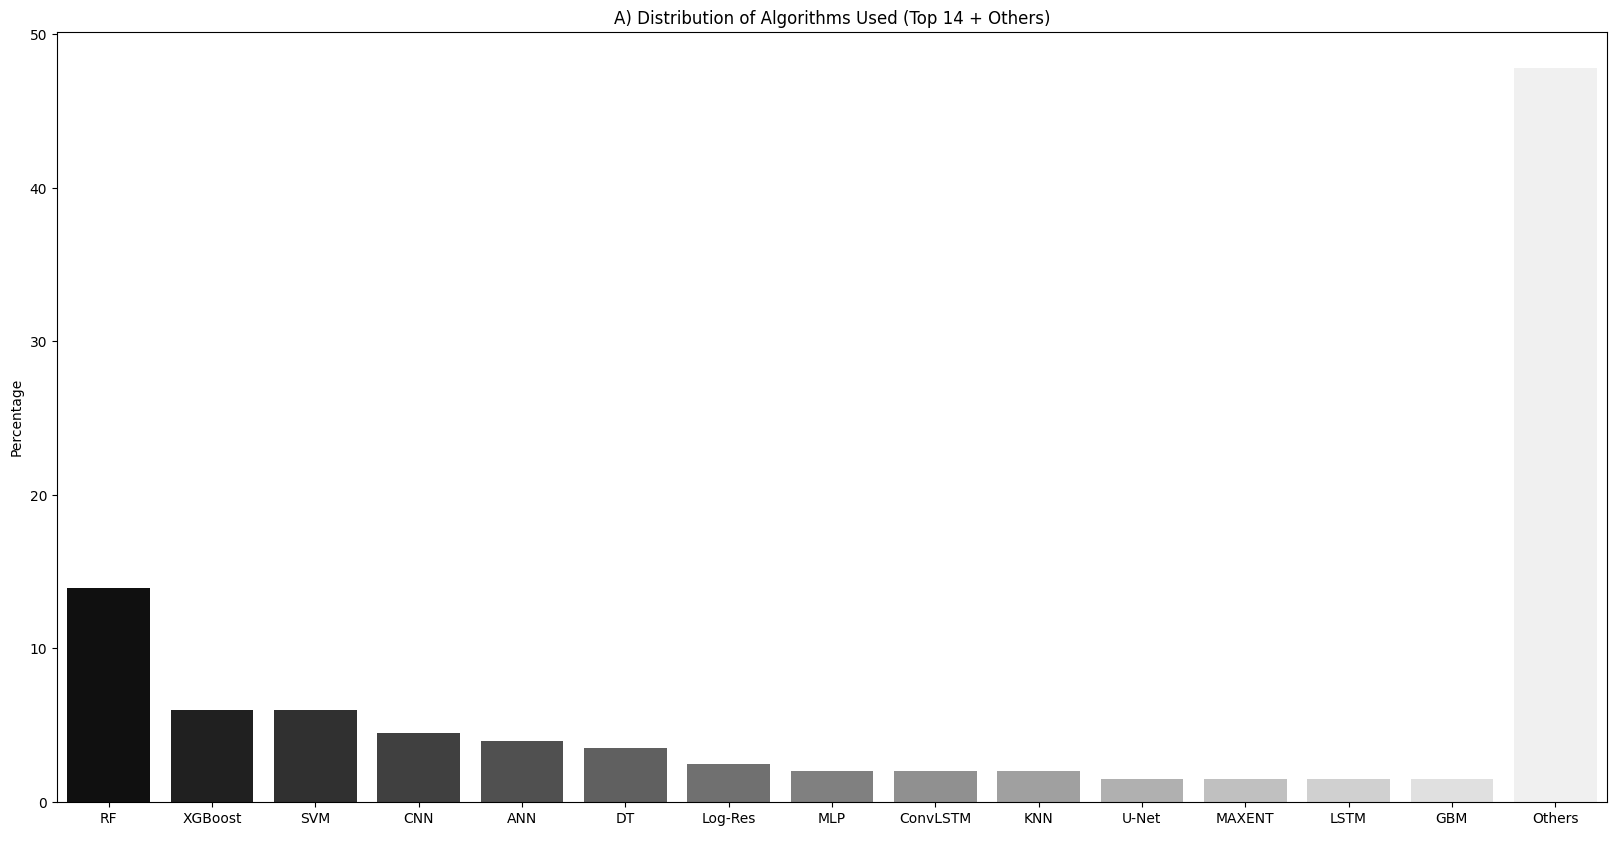

In [ ]:
# Create the bar chart with percentages
plt.figure(figsize=(20, 10))
sns.barplot(x=algorithms_percentages.index, y=algorithms_percentages.values, palette='gray')
plt.xticks(rotation=0)
plt.title("A) Distribution of Algorithms Used (Top 14 + Others)")
plt.xlabel(" ")
plt.ylabel("Percentage")
plt.yticks(range(0, 51, 10)) # Set y-axis ticks from 0 to 50%
plt.show()

In [ ]:
# How many are contained in the "Others" column?
others_value = algorithms_dist_with_others.get('Others', 0) # Use the correct variable
print(f"The 'Others' column contains: {others_value}")

The 'Others' column contains: 96


/tmp/ipython-input-2290279095.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




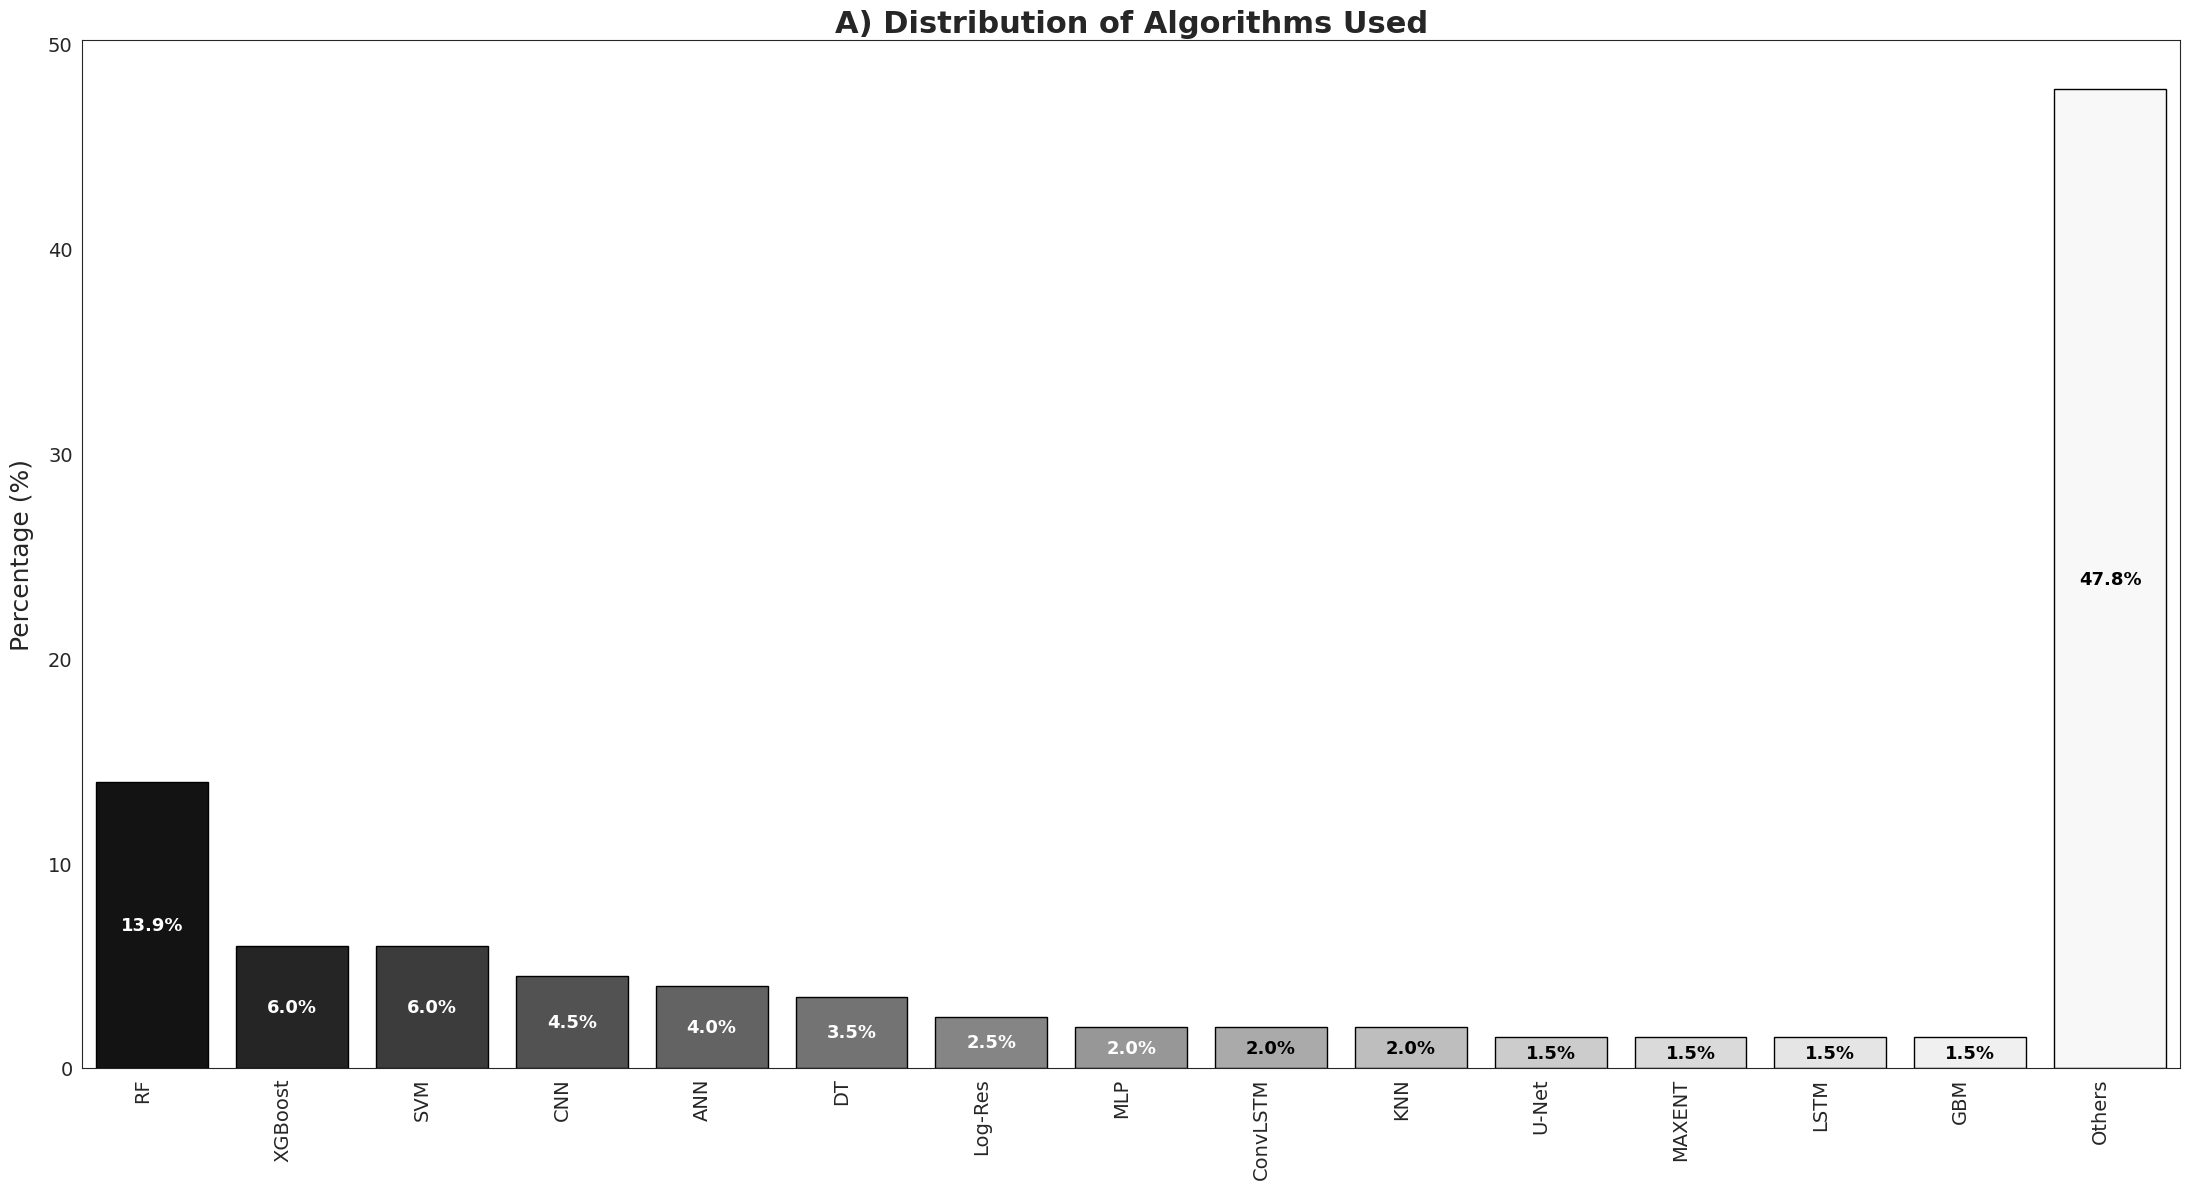

In [ ]:
# Calcular distribución
algorithms_distribution_all = df['Algoritmo'].value_counts()
total_count_alg = algorithms_distribution_all.sum()

# Top 14 + Others
top_14_alg_counts = algorithms_distribution_all.head(14)
others_count_alg = algorithms_distribution_all[14:].sum()
algorithms_dist_with_others = pd.concat([top_14_alg_counts, pd.Series({'Others': others_count_alg})])

# Calcular porcentajes
algorithms_percentages = (algorithms_dist_with_others / total_count_alg) * 100

# Estilo gráfico
sns.set_style("white")
plt.figure(figsize=(22, 12))

# Crear gráfico de barras
bars = sns.barplot(
    x=algorithms_percentages.index,
    y=algorithms_percentages.values,
    palette="Greys_r",
    edgecolor="black"
)

# Mejorar detalles
plt.title("A) Distribution of Algorithms Used", fontsize=22, weight="bold")
plt.xlabel("", fontsize=18)
plt.ylabel("Percentage (%)", fontsize=18, labelpad=10)
plt.xticks(rotation=90, ha="right", fontsize=14)  # rotados para mejor lectura
plt.yticks(range(0, 51, 10), fontsize=14)

# Añadir porcentajes dentro de las barras con contraste dinámico
for bar, value in zip(bars.patches, algorithms_percentages.values):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height / 2

    # Color de la barra
    facecolor = bar.get_facecolor()
    brightness = 0.299*facecolor[0] + 0.587*facecolor[1] + 0.114*facecolor[2]
    text_color = "black" if brightness > 0.6 else "white"

    plt.text(
        x, y,
        f"{value:.1f}%",
        ha="center", va="center",
        fontsize=13, color=text_color, weight="bold"
    )

# Ajustar y guardar
plt.tight_layout()
plt.savefig("algorithms_distribution.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
# Most used evaluation metrics

# Assuming 'df' is your DataFrame and 'Metrica de evaluacion' is the relevant column
# Consider renaming the column: e.g., df.rename(columns={'Metrica de evaluacion': 'Evaluation_Metric'}, inplace=True)
metric_counts = df['Metrica de evaluacion'].value_counts()

In [ ]:
# Filter metrics with 2 or more counts
top_metrics_counts = metric_counts[metric_counts >= 2] # Renamed

In [ ]:
# Create an "Others" category for metrics with only one count
other_metrics_count = metric_counts[metric_counts < 2].sum()
top_metrics_with_others = pd.concat([top_metrics_counts, pd.Series({'Others': other_metrics_count})]) # Renamed

/tmp/ipython-input-2390290755.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




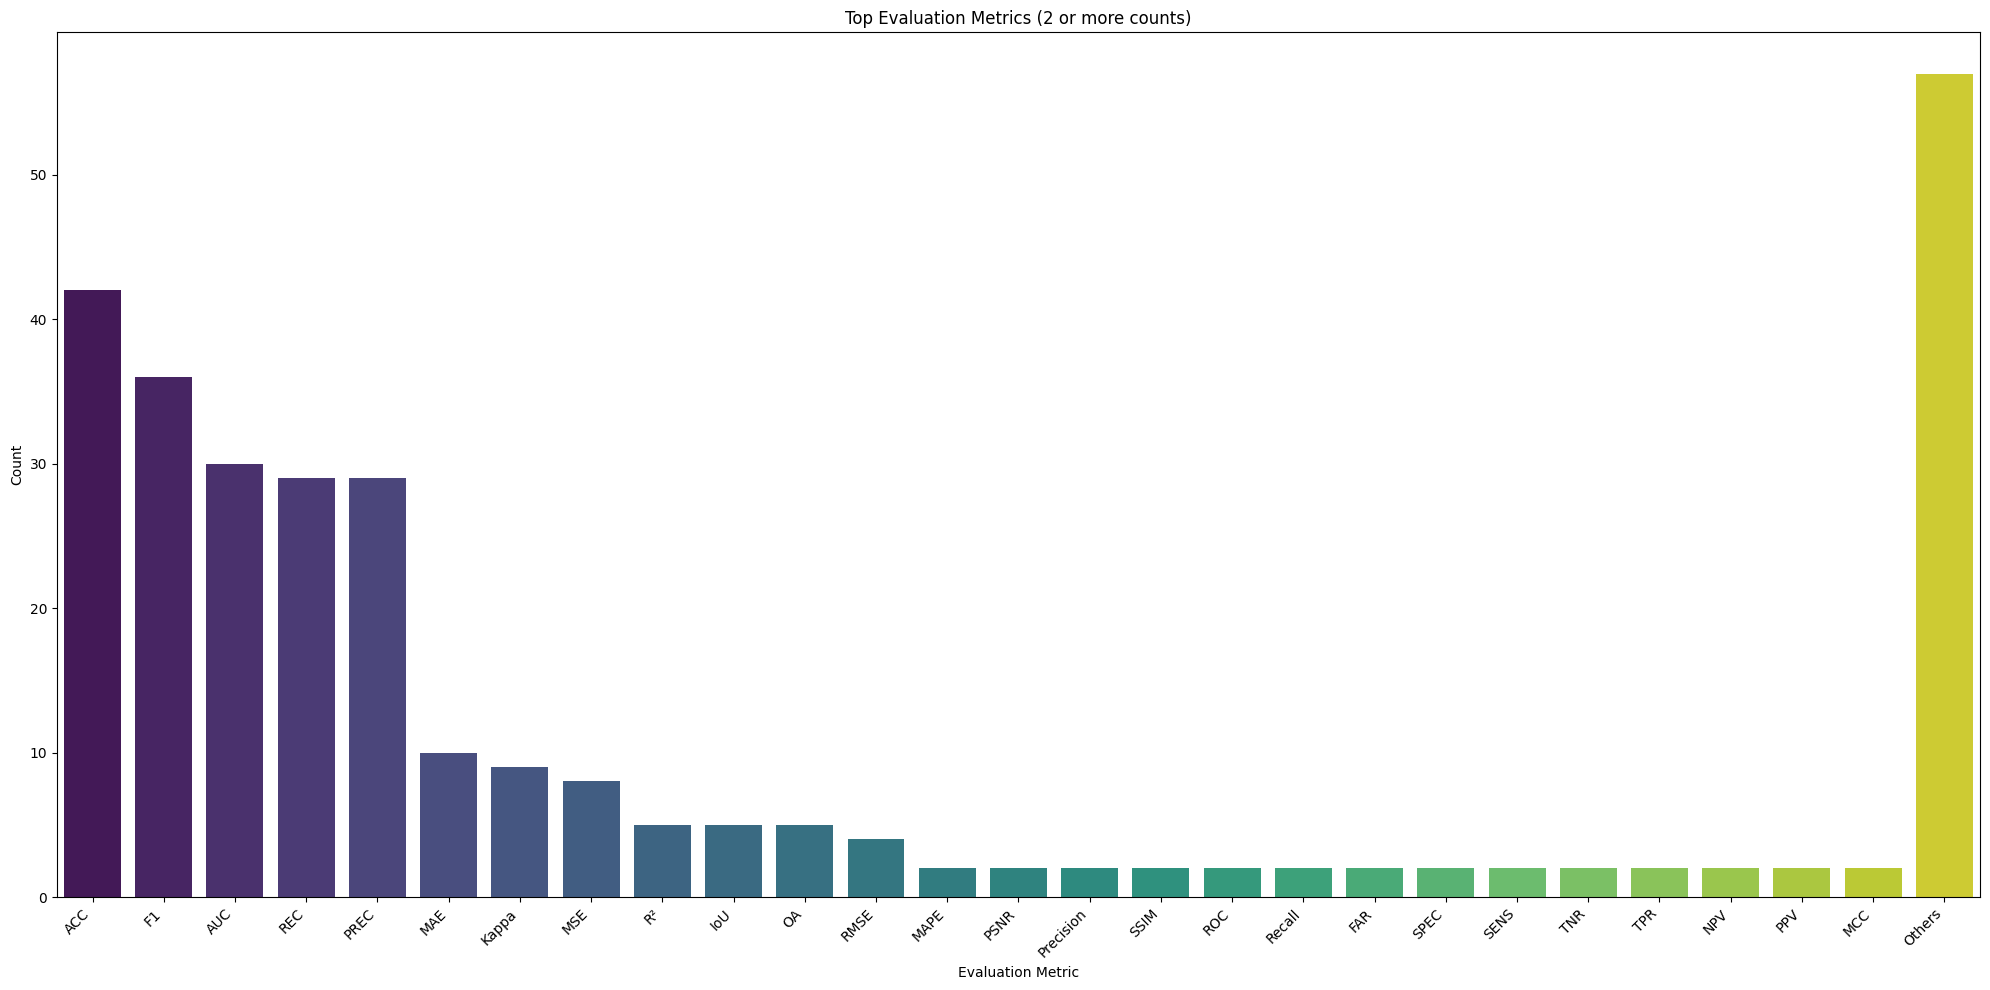

In [ ]:
# Create the bar chart
plt.figure(figsize=(20, 10))
sns.barplot(x=top_metrics_with_others.index, y=top_metrics_with_others.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top Evaluation Metrics (2 or more counts)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentages for metrics
total_metrics = top_metrics_with_others.sum()
top_metrics_percentages = (top_metrics_with_others / total_metrics) * 100

/tmp/ipython-input-729371093.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




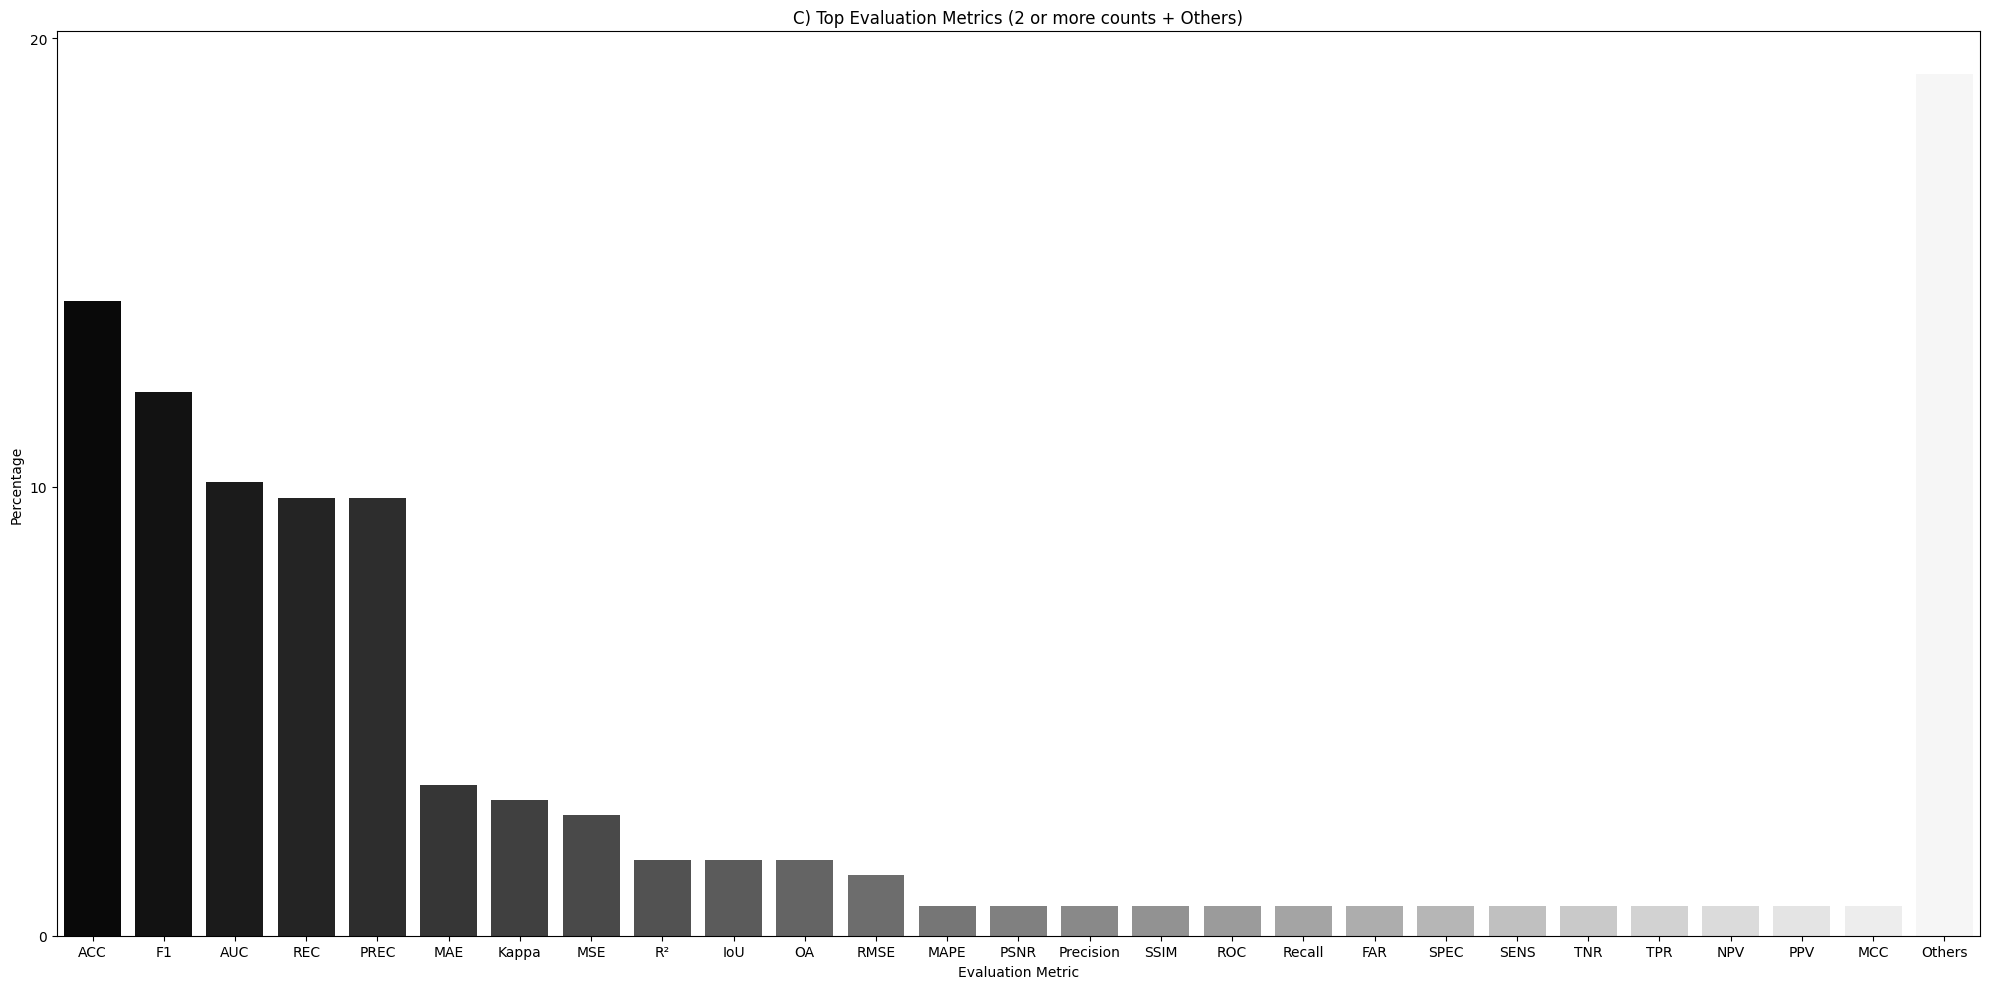

In [ ]:
# Create the bar chart with percentages
plt.figure(figsize=(20, 10))
sns.barplot(x=top_metrics_percentages.index, y=top_metrics_percentages.values, palette='grey')
plt.xticks(rotation=0, ha='center')
plt.title('C) Top Evaluation Metrics (2 or more counts + Others)') # Updated title
plt.xlabel('Evaluation Metric')
plt.ylabel('Percentage')  # Changed y-axis label
plt.yticks(range(0, int(top_metrics_percentages.max()) + 10, 10)) # Adjust y-ticks based on max percentage
plt.tight_layout()
plt.show()

In [ ]:
# How many are contained in the "Others" column for metrics?
others_metrics_value = top_metrics_with_others.get('Others', 0) # Use the correct variable
print(f"The 'Others' column for metrics contains: {others_metrics_value}")

The 'Others' column for metrics contains: 57


# Availability of repositories

In [ ]:
# Calculate counts for repository availability
# Consider renaming column: e.g., df.rename(columns={'Repositorio': 'Repository_Available'}, inplace=True)
repo_availability_counts = df['Repositorio'].value_counts() # Renamed

In [ ]:
# Calculate percentages
total_repos = repo_availability_counts.sum()
repo_availability_percentages = (repo_availability_counts / total_repos) * 100

/tmp/ipython-input-3945266858.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




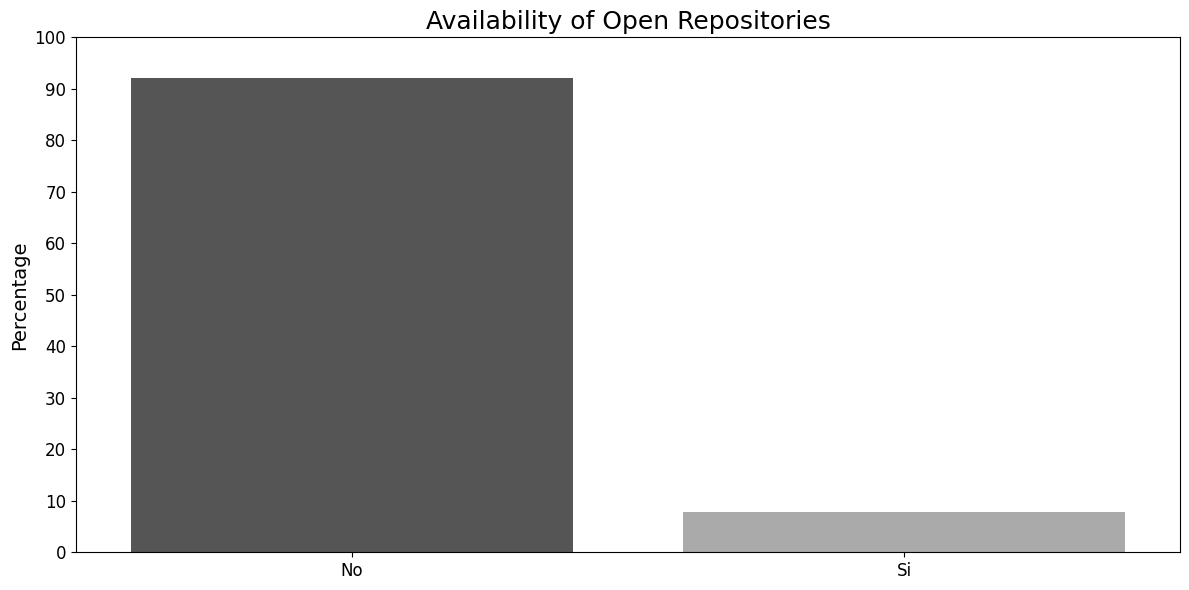

In [ ]:
# Create the bar chart with percentages
plt.figure(figsize=(12, 6)) # Adjusted figure size
sns.barplot(x=repo_availability_percentages.index, y=repo_availability_percentages.values, palette='grey')
plt.title("Availability of Open Repositories", fontsize=18) # Adjusted title and size
plt.xlabel("", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(0, 101, 10), fontsize=12) # Set y-ticks from 0 to 100%
plt.tight_layout()
plt.show()

/tmp/ipython-input-4023117094.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




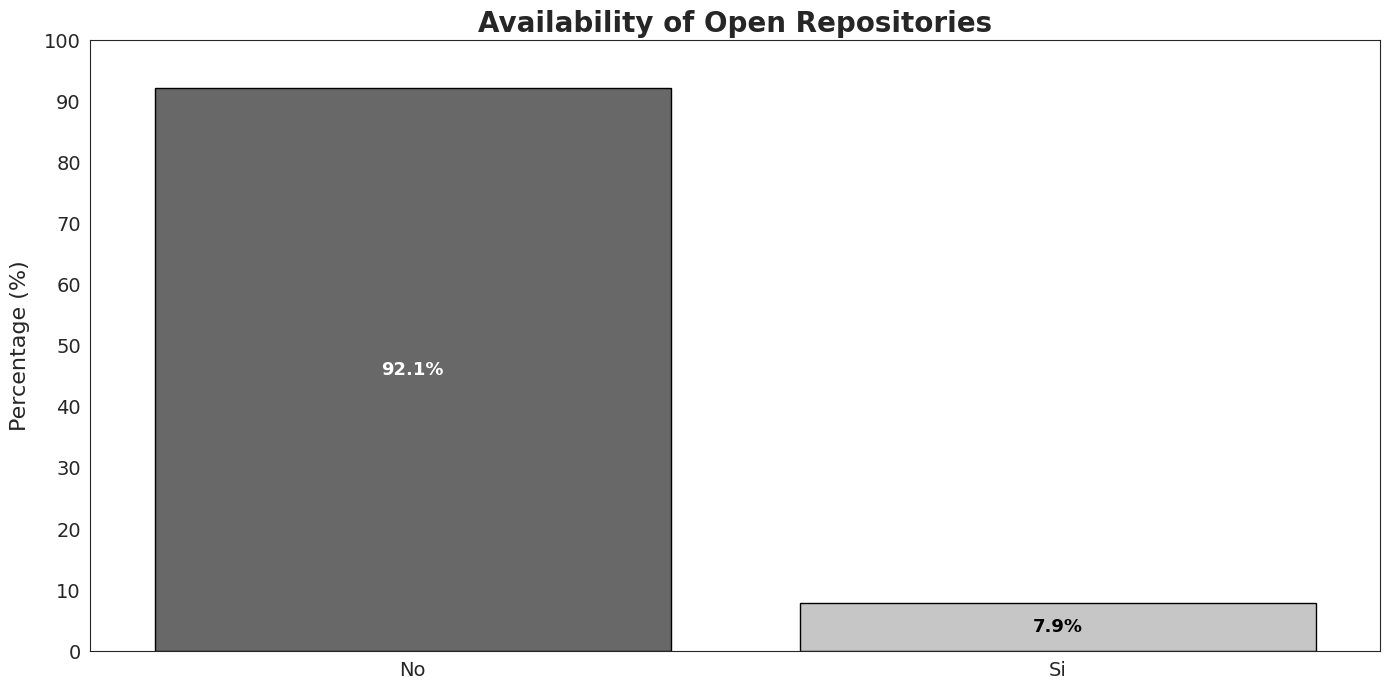

In [ ]:
# Crear gráfico de barras con porcentajes
sns.set_style("white")
plt.figure(figsize=(14, 7))

bars = sns.barplot(
    x=repo_availability_percentages.index,
    y=repo_availability_percentages.values,
    palette="Greys_r",
    edgecolor="black"
)

# Mejorar detalles del gráfico
plt.title("Availability of Open Repositories", fontsize=20, weight="bold")
plt.xlabel("", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(range(0, 101, 10), fontsize=14)

# Añadir etiquetas de porcentaje dentro de las barras con contraste dinámico
for bar, value in zip(bars.patches, repo_availability_percentages.values):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height / 2

    # Obtener color de la barra
    facecolor = bar.get_facecolor()
    brightness = 0.299*facecolor[0] + 0.587*facecolor[1] + 0.114*facecolor[2]
    text_color = "black" if brightness > 0.6 else "white"

    plt.text(
        x, y,
        f"{value:.1f}%",
        ha="center", va="center",
        fontsize=13, color=text_color, weight="bold"
    )

# Ajustar diseño y guardar
plt.tight_layout()
plt.savefig("repo_availability.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
# Print the counts for Si (Yes) and No
print(f"Total 'Yes': {repo_availability_counts.get('Si', 0)}")
print(f"Total 'No': {repo_availability_counts.get('No', 0)}")

Total 'Yes': 7
Total 'No': 82


In [ ]:
# Print the percentages for repository availability
for category, percentage in repo_availability_percentages.items():
    print(f"'{category}': {percentage:.2f}%")

'No': 92.13%
'Si': 7.87%


# Chi-squared test to see if there is a relationship between algorithm vs repository availability

In [ ]:
# Get the top 14 algorithms (already defined)
# top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

In [ ]:
# Filter the DataFrame to include only the top 14 algorithms
df_filtered_chi = df[df['Algoritmo'].isin(top_14_algorithms)].copy()

In [ ]:
# Select only necessary columns and remove rows with NaN values
df_chi_clean = df_filtered_chi[['Algoritmo', 'Repositorio']].dropna() # Renamed variable

In [ ]:
# Convert "Repositorio" column to binary values (1=Yes, 0=No)
df_chi_clean['Repository_Binary'] = df_chi_clean['Repositorio'].apply(lambda x: 1 if str(x).strip().lower() == 'si' else 0) # New binary column

In [ ]:
# Create the contingency table
contingency_table_chi = pd.crosstab(df_chi_clean['Algoritmo'], df_chi_clean['Repository_Binary']) # Use binary column

In [ ]:
# Perform the chi-squared test
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table_chi) # Renamed variables

In [ ]:
# Display results
print(f"Chi-squared: {chi2}")
print(f"P-value: {p_value}")

Chi-squared: 0.0
P-value: 1.0


In [ ]:
# Interpretation
def interpret_chi2_result(p_val, alpha=0.05): # Renamed function and variable
    if p_val < alpha:
        print("There is a significant relationship between the algorithm type and the availability of code in a repository.")
    else:
        print("No significant relationship was found between the algorithm type and the availability of code in a repository.")

interpret_chi2_result(p_value)

No significant relationship was found between the algorithm type and the availability of code in a repository.


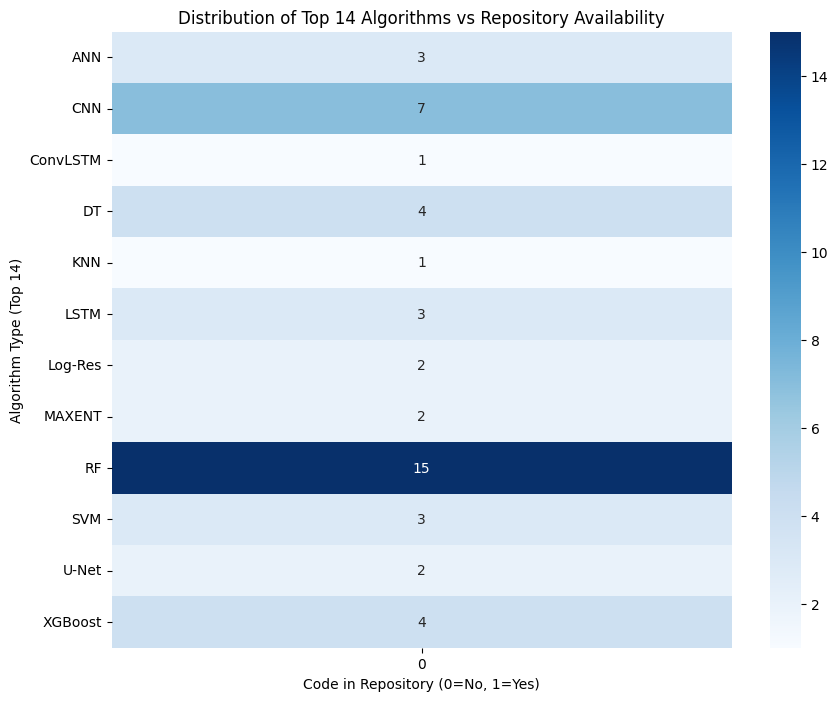

In [ ]:
# Visualization of the results (Contingency Table Heatmap)
plt.figure(figsize=(10,8)) # Adjusted size
sns.heatmap(contingency_table_chi, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Code in Repository (0=No, 1=Yes)') # Updated label
plt.ylabel('Algorithm Type (Top 14)') # Updated label
plt.title('Distribution of Top 14 Algorithms vs Repository Availability') # Updated title
plt.show()

In [ ]:
# prompt: Necesito hacer un codigo donde vengan las graficas A,B y C, donde tengan resolucion de 300p y que sean formato TIFF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def save_figs_tiff(fig, filename):
  canvas = FigureCanvas(fig)
  fig.savefig(filename, format='tiff', dpi=300)


# Assuming 'algorithms_percentages', 'top_metrics_percentages', and 'top_4_categories_percentages' are defined from the previous code
# Recreate the plots to ensure they have the necessary formatting for saving as TIFF images

# Figure A
fig_A = plt.figure(figsize=(20, 10))
sns.barplot(x=algorithms_percentages.index, y=algorithms_percentages.values, palette='gray')
plt.xticks(rotation=0)
plt.title("A) Distribution of Algorithms Used (Top 14 + Others)")
plt.xlabel(" ")
plt.ylabel("Percentage")
plt.yticks(range(0, 51, 10))
save_figs_tiff(fig_A, 'Figure_A.tiff')
plt.close(fig_A) # Close the figure to free up resources


# Figure B
fig_B = plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')
plt.title('B) Source Categories (Percentage)')
plt.xlabel('Source Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0, ha='center')
save_figs_tiff(fig_B, 'Figure_B.tiff')
plt.close(fig_B)


# Figure C
fig_C = plt.figure(figsize=(20, 10))
sns.barplot(x=top_metrics_percentages.index, y=top_metrics_percentages.values, palette='grey')
plt.xticks(rotation=0, ha='center')
plt.title('C) Top Evaluation Metrics (2 or more counts + Others)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Percentage')
plt.yticks(range(0, int(top_metrics_percentages.max()) + 10, 10))
save_figs_tiff(fig_C, 'Figure_C.tiff')
plt.close(fig_C)



<ipython-input-82-5a3b44a05746>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-82-5a3b44a05746>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-82-5a3b44a05746>:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<ipython-input-103-e1c98a07a61a>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-103-e1c98a07a61a>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-103-e1c98a07a61a>:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-103-e1c98a07a61a>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




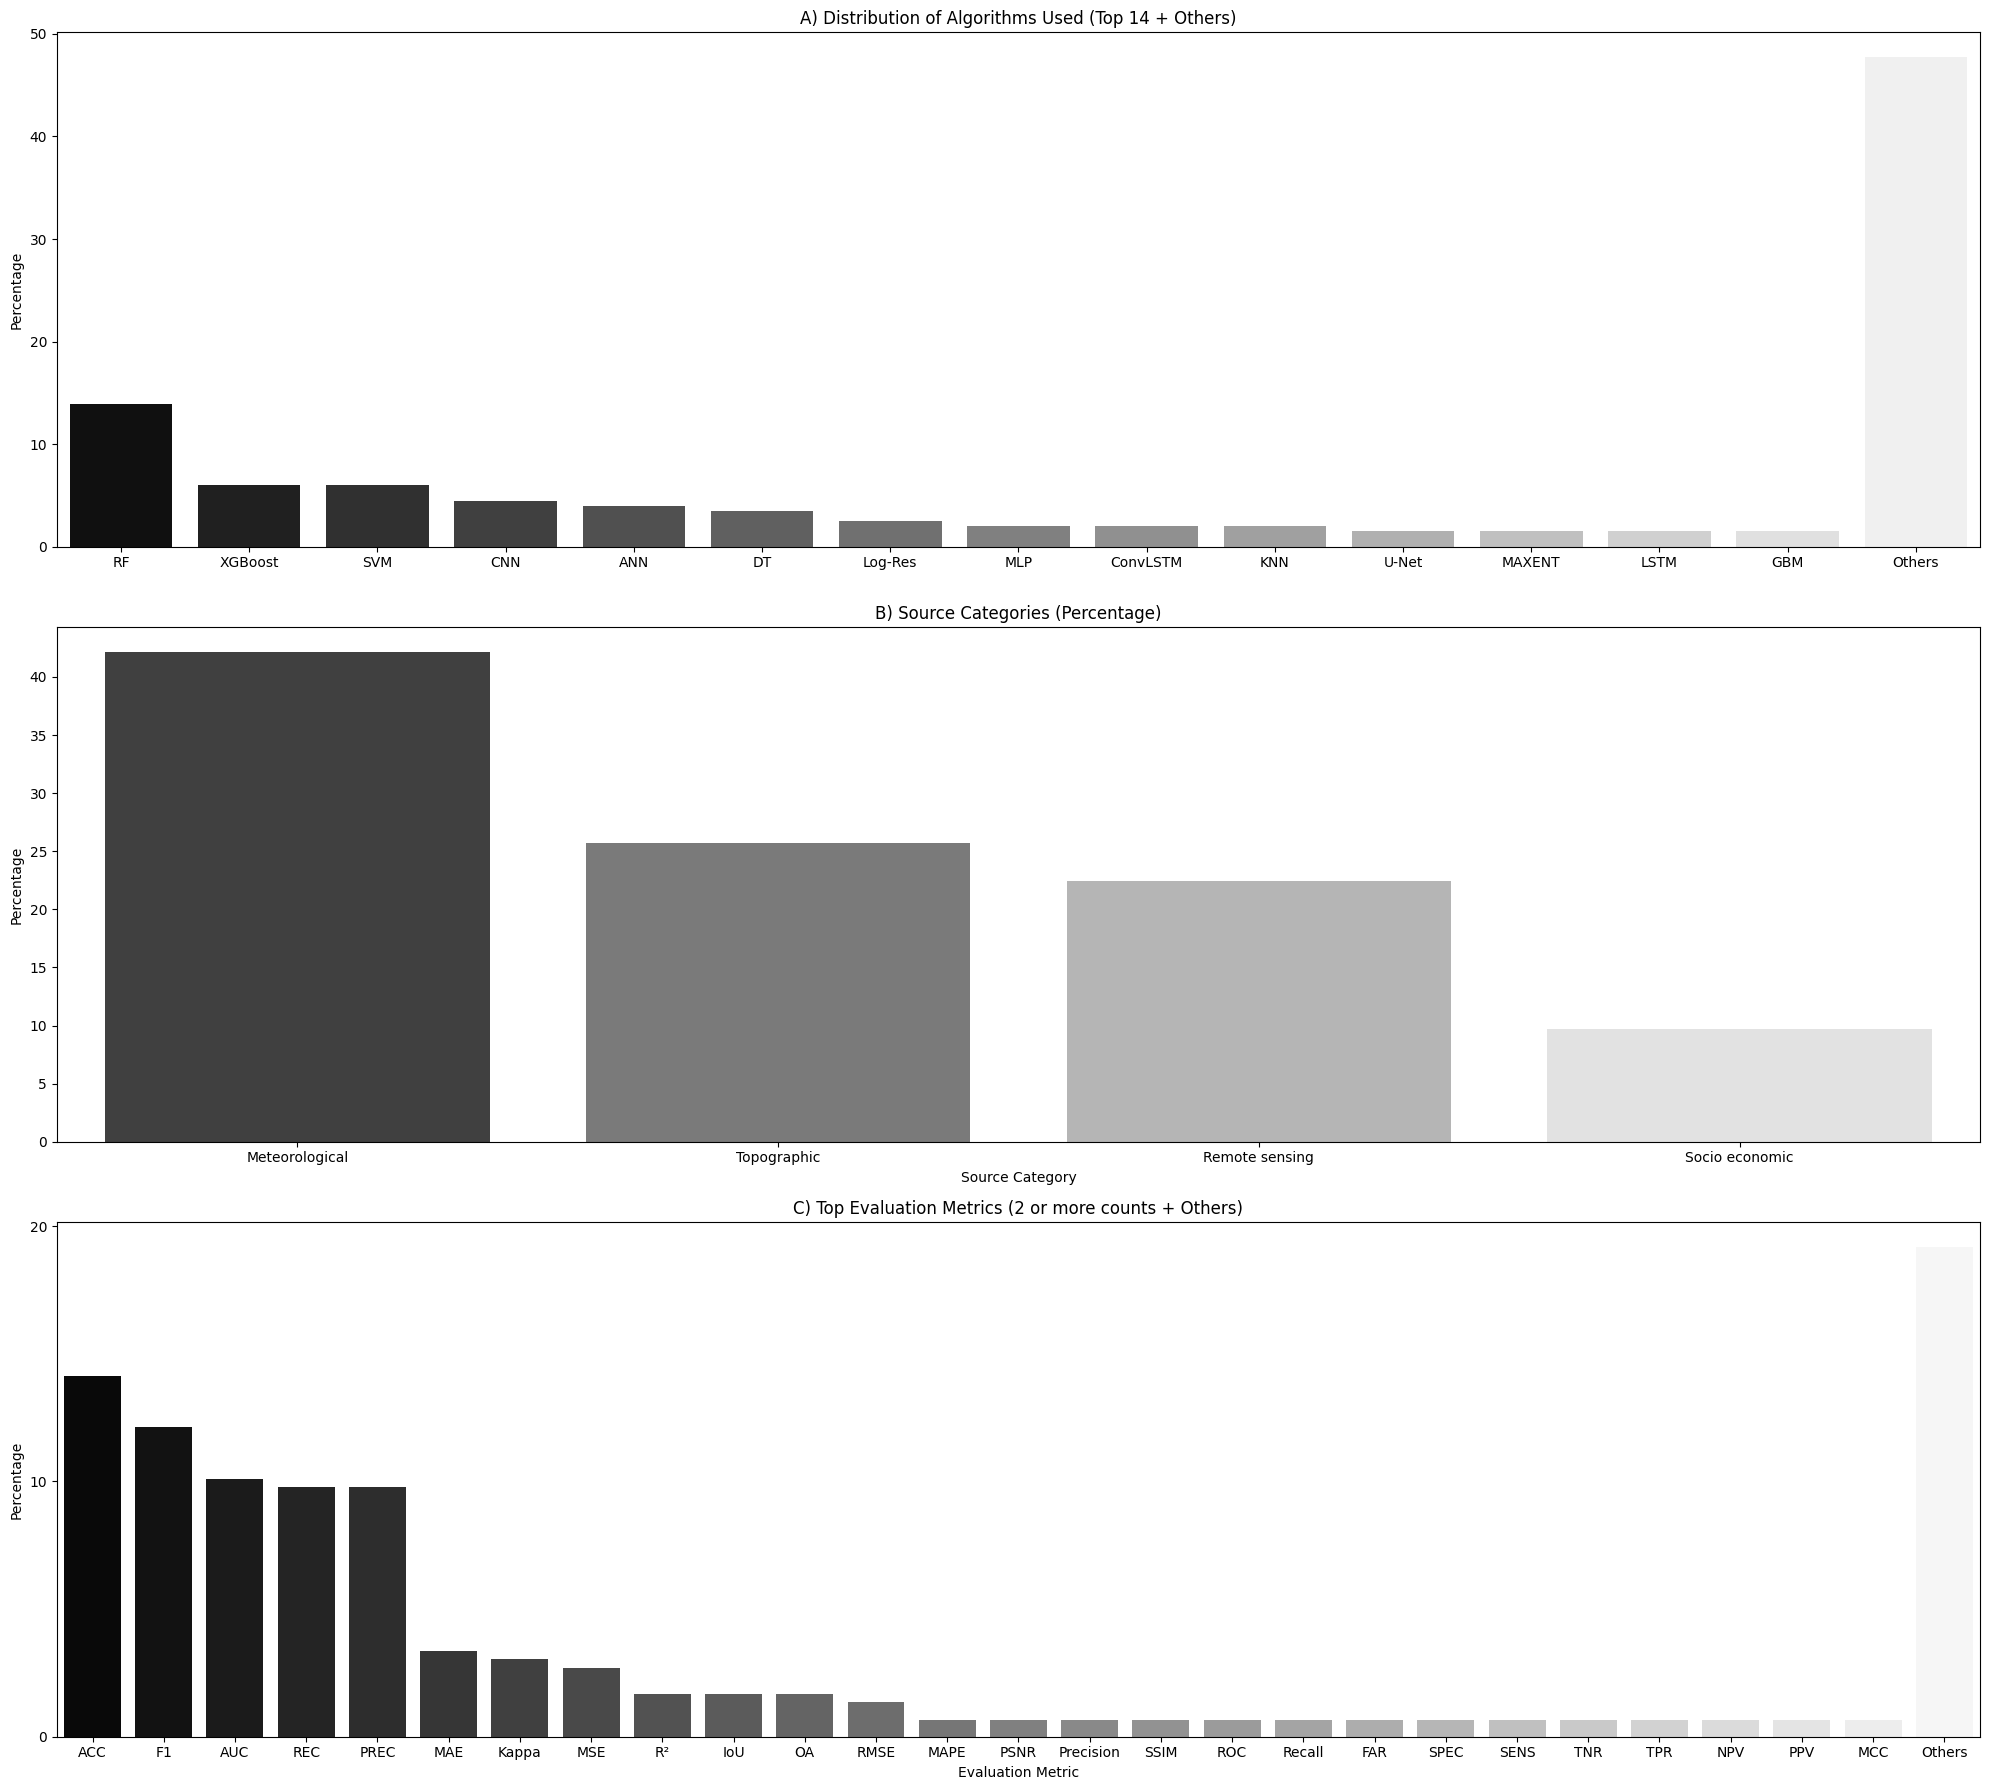

In [ ]:
# prompt: puedes fusionar los plots anteriores en una sola? y que se descargue en 300p y TIFF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

# Assuming 'algorithms_percentages', 'top_metrics_percentages', and 'top_4_categories_percentages' are defined

def save_figs_tiff(fig, filename):
  canvas = FigureCanvas(fig)
  fig.savefig(filename, format='tiff', dpi=300)

# Combined Figure
fig, axes = plt.subplots(3, 1, figsize=(20, 18)) # 3 subplots, adjust figsize as needed

# Plot A
sns.barplot(ax=axes[0], x=algorithms_percentages.index, y=algorithms_percentages.values, palette='gray')
axes[0].set_xticks(range(len(algorithms_percentages.index)))
axes[0].set_xticklabels(algorithms_percentages.index, rotation=0)
axes[0].set_title("A) Distribution of Algorithms Used (Top 14 + Others)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Percentage")
axes[0].set_yticks(range(0, 51, 10))

# Plot B
sns.barplot(ax=axes[1], x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')
axes[1].set_title('B) Source Categories (Percentage)')
axes[1].set_xlabel('Source Category')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(top_4_categories_percentages.index, rotation=0, ha='center')

# Plot C
sns.barplot(ax=axes[2], x=top_metrics_percentages.index, y=top_metrics_percentages.values, palette='grey')
axes[2].set_xticks(range(len(top_metrics_percentages.index)))
axes[2].set_xticklabels(top_metrics_percentages.index, rotation=0, ha='center')
axes[2].set_title('C) Top Evaluation Metrics (2 or more counts + Others)')
axes[2].set_xlabel('Evaluation Metric')
axes[2].set_ylabel('Percentage')
axes[2].set_yticks(range(0, int(top_metrics_percentages.max()) + 10, 10))


plt.tight_layout()  # Adjust layout to prevent overlapping elements
save_figs_tiff(fig, 'combined_figure.tiff')
plt.show()

plt.close(fig) # Close the figure


In [ ]:
# prompt: Haz otro codigo como en el anterior, para que el heatmap y el open repositories este a 300p y TIFF

import matplotlib.pyplot as plt

# ... (Your save_figs_tiff function)

# ... (Your existing code for Figures A, B, and C)

# Save the repository availability plot as TIFF with 300 DPI
plt.figure(figsize=(12, 6)) # Adjusted figure size
sns.barplot(x=repo_availability_percentages.index, y=repo_availability_percentages.values, palette='grey')
plt.title("Availability of Open Repositories", fontsize=18) # Adjusted title and size
plt.xlabel("", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(0, 101, 10), fontsize=12) # Set y-ticks from 0 to 100%
plt.tight_layout()
plt.savefig('repository_availability.tiff', dpi=300) # Save as TIFF
plt.close() # Close the figure

# Save the contingency table heatmap
plt.figure(figsize=(10,8)) # Adjusted size
sns.heatmap(contingency_table_chi, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Code in Repository (0=No, 1=Yes)') # Updated label
plt.ylabel('Algorithm Type (Top 14)') # Updated label
plt.title('Distribution of Top 14 Algorithms vs Repository Availability') # Updated title
plt.savefig('contingency_table_heatmap.tiff', dpi=300) # Save as TIFF
plt.close() # Close the figure

# Save the sankey diagram
fig_sankey.write_image("sankey_diagram.tiff", scale=2)


<ipython-input-86-b66dfd21640e>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
# prompt: haz otro para el heatmap y el open repositories

# Assuming grouped_data_top14 is already defined from the previous code

import altair as alt

# Create the adjusted heatmap with larger size and font
heatmap_adjusted = alt.Chart(grouped_data_top14).mark_rect().encode(
    x=alt.X('Pais de estudio', title='Country of Study', sort='-y'), # Sort x-axis by y-axis values
    y=alt.Y('Algoritmo', title='Algorithm'),
    color=alt.Color('Count', title='Count', scale=alt.Scale(scheme='viridis')), # Use a different color scheme
    tooltip=['Algoritmo', 'Pais de estudio', 'Count']
).properties(
    title='Heatmap of Algorithm vs. Country of Study (Top 14 Algorithms)',
    width=800,  # Adjusted width
    height=600   # Adjusted height
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).configure_legend(
    titleFontSize=12,
    labelFontSize=10
).interactive()

# Display the heatmap
heatmap_adjusted


alt.Chart(...)